In [1]:

import torch
import torch.nn as nn  # Neural network module
import numpy as np
import matplotlib.pyplot as plt  # For plotting
%matplotlib inline

In [2]:
X = torch.linspace(1,70,70).reshape(-1,1)


In [3]:
torch.manual_seed(59) # to obtain reproducible results
e = torch.randint(-8,9,(70,1),dtype=torch.float)


In [4]:

y = 2*X + 1 + e
print(y.shape)

torch.Size([70, 1])


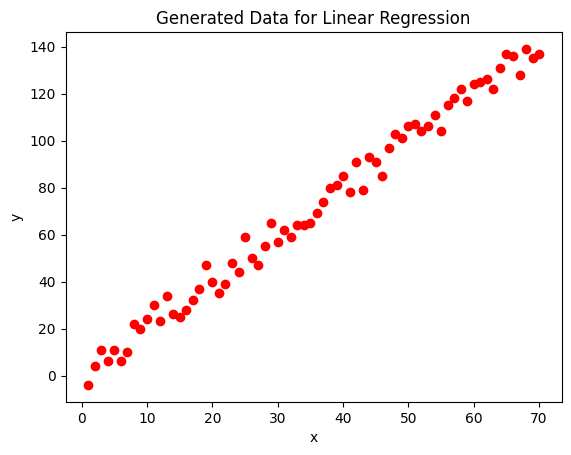

In [5]:
plt.scatter(X.numpy(), y.numpy(),color='red')  # Scatter plot of data points
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.show()

In [6]:
torch.manual_seed(59)
model = nn.Linear(1, 1)
print('Weight:', model.weight.item())
print('Bias:  ', model.bias.item())



Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [7]:

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [8]:
epochs = 50  # Number of training iterations
losses = []  # List to store loss values

for epoch in range(1, epochs + 1):  # Start from 1 to 50
    optimizer.zero_grad()  # Clear previous gradients
    y_pred = model(X)  # Forward pass
    loss = loss_function(y_pred, y)  # Compute loss
    losses.append(loss.item())  # Store loss value

    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Print loss, weight, and bias for EVERY epoch (1 to 50)
    print(f'epoch: {epoch:2}  loss: {loss.item():10.8f}  '
          f'weight: {model.weight.item():10.8f}  '
          f'bias: {model.bias.item():10.8f}')


epoch:  1  loss: 5977.38916016  weight: 0.73648739  bias: 0.97714233
epoch:  2  loss: 2664.08569336  weight: 1.15650094  bias: 0.98600930
epoch:  3  loss: 1193.79235840  weight: 1.43629313  bias: 0.99189240
epoch:  4  loss: 541.34301758  weight: 1.62267685  bias: 0.99578774
epoch:  5  loss: 251.81579590  weight: 1.74683666  bias: 0.99835902
epoch:  6  loss: 123.33683014  weight: 1.82954609  bias: 1.00004828
epoch:  7  loss: 66.32374573  weight: 1.88464344  bias: 1.00114989
epoch:  8  loss: 41.02386475  weight: 1.92134690  bias: 1.00186014
epoch:  9  loss: 29.79692650  weight: 1.94579732  bias: 1.00230968
epoch: 10  loss: 24.81491280  weight: 1.96208549  bias: 1.00258553
epoch: 11  loss: 22.60409546  weight: 1.97293639  bias: 1.00274563
epoch: 12  loss: 21.62299538  weight: 1.98016512  bias: 1.00282872
epoch: 13  loss: 21.18760300  weight: 1.98498106  bias: 1.00286043
epoch: 14  loss: 20.99437332  weight: 1.98818970  bias: 1.00285792
epoch: 15  loss: 20.90859604  weight: 1.99032760  bia

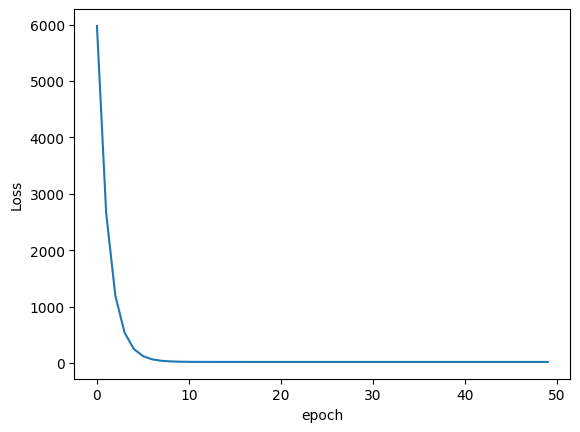

In [9]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');
plt.show()


In [10]:
x1 = torch.tensor([X.min().item(), X.max().item()])

# Extract model parameters
# Access weight and bias directly from the model
w1, b1 = model.weight.item(), model.bias.item()

# Compute y1 (predicted values)
y1 = x1 * w1 + b1



In [11]:
print(f'Final Weight: {w1:.8f}, Final Bias: {b1:.8f}')
print(f'X range: {x1.numpy()}')
print(f'Predicted Y values: {y1.numpy()}')

Final Weight: 1.99464333, Final Bias: 1.00044870
X range: [ 1. 70.]
Predicted Y values: [  2.995092 140.62547 ]


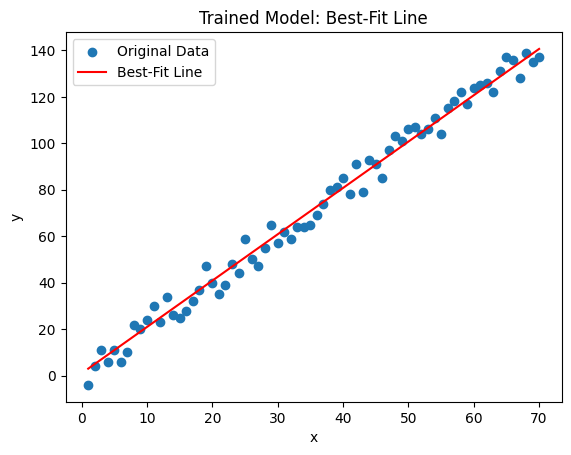

In [12]:
plt.scatter(X.numpy(), y.numpy(), label="Original Data")
plt.plot(x1.numpy(), y1.numpy(), 'r', label="Best-Fit Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained Model: Best-Fit Line')
plt.legend()
plt.show()